# Principal Component Analysis
                  

## Problem Statement

Dataset : Iris dataset
It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. Perform PCA on the Iris data set to visualize how PCA works.

In [25]:
# Import the libraries

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [26]:
iris_data = pd.read_csv("E:\Sankhyana Training\Datasets/Iris.csv")
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
# descriptive statistics
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Replacing the categorical species column to numerioical values

In [29]:
## Label encoding since the PCA alfgorithm does not take non numerical or boolean data as inputs

iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [30]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


#### Visualizing the graph that counts all values for each flower

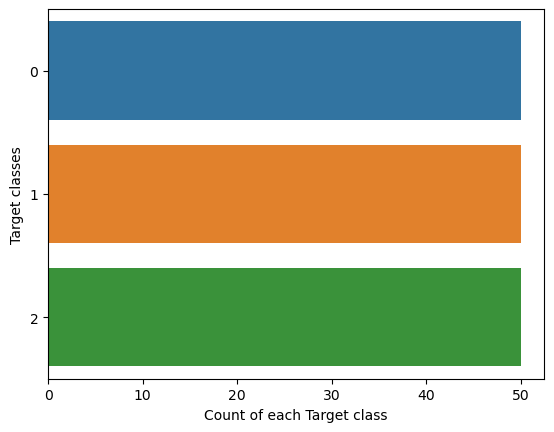

In [31]:

sns.countplot(y=iris_data.Species ,data=iris_data) 
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [32]:
iris_data1=iris_data.drop(['Id'], axis=1)
iris_data1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Load feature and target saperately


In [33]:
from sklearn import datasets
# input features
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [34]:
#target features
y = iris.target
y.shape

(150,)

### Standardize the data       

In [35]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler  
x_scaled = StandardScaler().fit_transform(X)

### Dimention Reduction using PCA
                       

In [36]:
from sklearn.decomposition import PCA 
 
pca = PCA(n_components=3) 
 
pca_features = pca.fit_transform(x_scaled) 

print('Shape before PCA: ', x_scaled.shape) 
print('Shape after PCA: ', pca_features.shape) 

pca_df = pd.DataFrame(data=pca_features, columns=['PC1', 'PC2', 'PC3']) 

Shape before PCA:  (150, 4)
Shape after PCA:  (150, 3)


In [37]:
pca_df.head() 

,PC1,PC2,PC3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


       

### Map targets to Principal Components

In [38]:
# Creates a dictionary to map numeric target labels to corresponding iris species names.
target_names = {0:'setosa',1:'versicolor', 2:'virginica'} 

pca_df['target'] = y

pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,PC3,target
0,-2.264703,0.480027,0.127706,setosa
1,-2.080961,-0.674134,0.234609,setosa
2,-2.364229,-0.341908,-0.044201,setosa
3,-2.299384,-0.597395,-0.091290,setosa
4,-2.389842,0.646835,-0.015738,setosa


In [39]:
# Retrieves the variance captured by each principal component
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

### Plot the explained variance

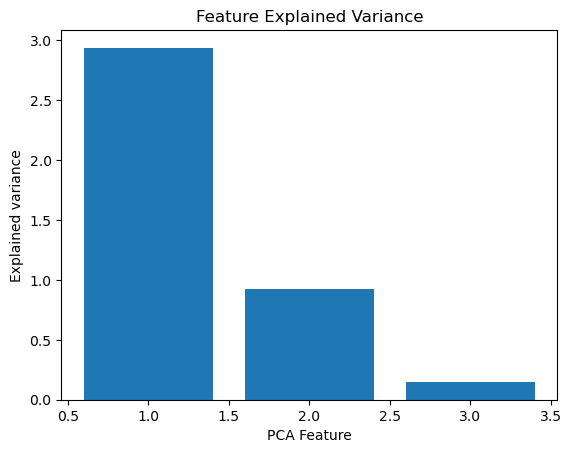

In [40]:
pca = PCA(n_components=3) #  Initializes PCA to reduce the data to 3 principal components.
pca.fit_transform(x_scaled) 
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [41]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [42]:

pca = PCA()
X_new = pca.fit_transform(X) 

In [43]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [44]:
knn_pca = KNeighborsClassifier(7) # Initializes a K-Nearest Neighbors classifier with 7 neighbors.
knn_pca.fit(X_train,y_train)  # Trains the KNN model using the training data (X_train, y_train).
print("Train score after PCA",knn_pca.score(X_train,y_train),"%")  

Train score after PCA 0.9714285714285714 %
